In [1]:
import pickle
from pathlib import Path
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt
import getpass

In [2]:
#add the github path that will run the notebooks: 
username = getpass.getuser() # gets the username from the current comp 
print (username)

gilmandelbaum


In [6]:
sys.path.insert(0,'/Users/{:}/github/analysis-pipeline-for-photometry_ex/Nb_data_set/1.data_set_lineplot'.format(username))

In [7]:
sys.path[0]

'/Users/gilmandelbaum/github/analysis-pipeline-for-photometry_ex/Nb_data_set/1.data_set_lineplot'

In [8]:
import data_set_lineplot_ic_together_helper_functions as dslhf

In [9]:
seq_str = '0a1b2a3b4abcd5a6a7a'
period_of_interest = "Reward_NoReward_tag"
HowManyBasck=1
folderName="right_dual_color_photo_full_data_set_after_inspection" #folder where the plot data_set will be saved 
path = "/Volumes/GilInVivoPaper.large/2.Photometry_in_str/2.dual_color_photo_full_data_set_analysis_2/"

# Folder name of analysis: 

In [10]:
analysis_type ="data_set_lineplot_(ic_together)"

In [11]:
sys.executable

'/anaconda3/bin/python3'

# Import the data and where to save it 

In [12]:
path_to_save = path+"/"+folderName+"/"+seq_str #also for loading

# Import the data and where to save it 

In [13]:
%%time
root = Path(path_to_save)
d = "data_set"+"_"+seq_str+'.pickle'
my_path = root / d 
fileToOpen = open(my_path, 'rb')
data_set = pickle.load(fileToOpen)

CPU times: user 15.6 s, sys: 1.99 s, total: 17.6 s
Wall time: 36.2 s


In [14]:
y_axis_list = ["df_f","z_score","z_score_sliding_window"]

In [15]:
alphabet = ["a","b","c","d","e","f","g"]
y_axis = y_axis_list[alphabet.index(seq_str[:seq_str.index('4')][-1])]
print (y_axis)

z_score


In [16]:
#period_of_interest="combined_periods_1"
#period_of_interest = "pre_firstENLp_tag"
#period_of_interest="last_200_bins_ENL_tag"
#period_of_interest = "first_15_bins_Cue_to_Sel_tag"
#period_of_interest="first_15_bins_Cue_to_Sel_fromPrevTrial_tag"
#period_of_interest="Real_nTrials"
#period_of_interest="Cue_to_Sel_tag"
#period_of_interest="Cue_to_Sel_fromPrevTrial_tag"

In [17]:
# stash result in a cache directory, for how many back. 
cache_dir_plt = os.path.join(path_to_save,analysis_type,period_of_interest)
if not os.path.exists(cache_dir_plt):
    os.makedirs(cache_dir_plt)

In [18]:
cache_dir_plt

'/Volumes/GilInVivoPaper.large/2.Photometry_in_str/2.dual_color_photo_full_data_set_analysis_2//right_dual_color_photo_full_data_set_after_inspection/0a1b2a3b4abcd5a6a7a/data_set_lineplot_(ic_together)/Reward_NoReward_tag'

# generate data sets of interest

In [19]:
r_ls_period_d1_data_set= dslhf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,0,
                                                                           period_of_interest,"d1 R")

In [20]:
r_ls_period_d2_data_set= dslhf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,0,
                                                                           period_of_interest,"d2 R")

In [21]:
r_wr_period_d1_data_set= dslhf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,3,
                                                                           period_of_interest,"d1 R")

In [22]:
r_wr_period_d2_data_set= dslhf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,3,
                                                                           period_of_interest,"d2 R")

# Calculate means per each session 

In [23]:
r_ls_period_d1_df = dslhf.calculate_mean_data_set(r_ls_period_d1_data_set)

In [24]:
r_ls_period_d2_df = dslhf.calculate_mean_data_set(r_ls_period_d2_data_set)

In [25]:
r_wr_period_d1_df = dslhf.calculate_mean_data_set(r_wr_period_d1_data_set)

In [26]:
r_wr_period_d2_df = dslhf.calculate_mean_data_set(r_wr_period_d2_data_set)

# Calculate means and sem on the data set 

In [27]:
r_ls_period_d1_mean_sem = dslhf.calculate_mean_sem (r_ls_period_d1_df)

In [28]:
r_ls_period_d2_mean_sem = dslhf.calculate_mean_sem (r_ls_period_d2_df)

In [29]:
r_wr_period_d1_mean_sem = dslhf.calculate_mean_sem (r_wr_period_d1_df)

In [30]:
r_wr_period_d2_mean_sem = dslhf.calculate_mean_sem (r_wr_period_d2_df)

# make_sem_traces

In [31]:
r_ls_period_d1_sem_traces = dslhf.make_sem_traces(r_ls_period_d1_mean_sem)

In [32]:
r_ls_period_d2_sem_traces = dslhf.make_sem_traces(r_ls_period_d2_mean_sem)

In [33]:
r_wr_period_d1_sem_traces = dslhf.make_sem_traces(r_wr_period_d1_mean_sem)

In [34]:
r_wr_period_d2_sem_traces = dslhf.make_sem_traces(r_wr_period_d2_mean_sem)

# plots

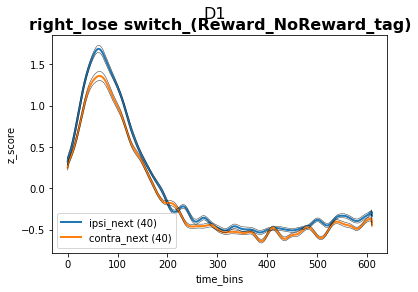

In [35]:
dslhf.plot_ipsi_contra_together(r_ls_period_d1_mean_sem,
                              r_ls_period_d1_sem_traces,
                              "right_lose switch",period_of_interest,"D1",y_axis,cache_dir_plt)

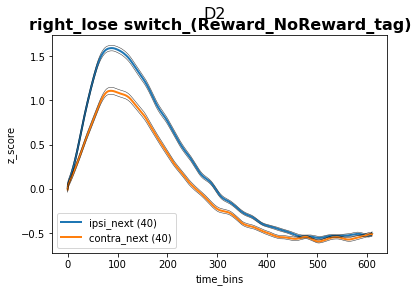

In [36]:
dslhf.plot_ipsi_contra_together(r_ls_period_d2_mean_sem,
                              r_ls_period_d2_sem_traces,
                              "right_lose switch",period_of_interest,"D2",y_axis,cache_dir_plt)

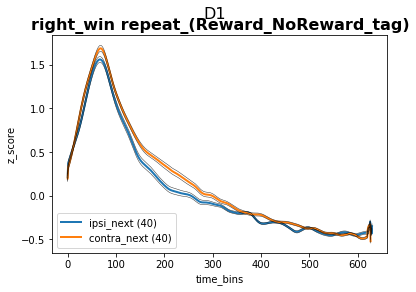

In [38]:
dslhf.plot_ipsi_contra_together(r_wr_period_d1_mean_sem,
                              r_wr_period_d1_sem_traces,
                              "right_win repeat",period_of_interest,"D1",y_axis,cache_dir_plt)

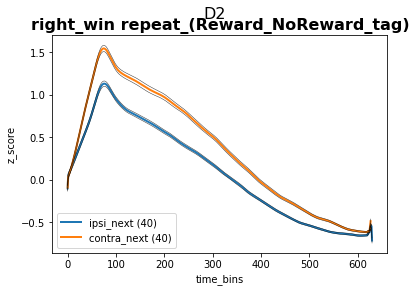

In [39]:
dslhf.plot_ipsi_contra_together(r_wr_period_d2_mean_sem,
                              r_wr_period_d2_sem_traces,
                              "right_win repeat",period_of_interest,"D2",y_axis,cache_dir_plt)